# 2. Linear Regression

## 2.1 Introduction

- Linear regression may be both the simplest and most popular among the standard tools to regression. Dating back to the dawn of the 19th century, linear regression flows from a few simple assumptions:
    1. Linear relationship between independent variables $x$ and dependent variable $y$, in other words, $y$ can be expressed as a weighted sum of elements in $x$ plus some observational noise.
    2. The noise follows a Gaussian distribution $Gaussian(\mu,\sigma)$
    3. Constant variance (homoscedasticity). This means that different values of the response variable have the same variance in their errors, regardless of the values of the predictor variables (which means $\sigma$ above should approximately be a constant value, not a random variable)

## 2.2 Terminology and formulation

- Given the dataset $D := \{(x_i,y_i)\}_{i=1}^n$ with the linear relationship assumption can be expressed as
$$y_i = \beta_0 + \beta_1 x_i^1 + \beta_2 x_i^2 + ... + \beta_d x_i^d + \epsilon_i = x_i^T \beta + \epsilon_i$$ with $\beta_i \in \mathbb{R}$. 
For the pair of data $(y_i,x_i)$ and $x_i = [x_i^1,x_i^2,...,x_i^d]$ or equivalently, the independent variable $x$ has $d$ features. In the matrix form
$$y = X\beta + \epsilon$$
Where $y,\epsilon,\beta \in \mathbb{R}^n, X \in\mathbb{R}^{n\times d}$
- Note: $\beta$ is representating for the linear relationship between $y,X$, not a set of learned parameters (because we include the noise in the function).

## 2.3 Building the predictor

- We define the model parameter as $\beta = [\beta_0,\beta_1,...,\beta_n]$, and the predicted dependent variable $\hat{y}$. The linear model is defined as
$$\hat{y}_j = \sum_{i=1}^n x_j^i \cdot \beta_i + \beta_0$$
$$\hat{y} = X\beta + \beta_0$$

- **Loss function**: in the previous lecture, we learn about the process of measuring the differences. FOr standard linear regression (you can have different type of linear regression based on the model architecture as well as loss function), the loss function indicates the mean of **Euclidean distance** between predicted - ground truth values

$$\mathbf{L}^i(D,\beta) = \frac{1}{2}(\hat{y}^i-y^i)^2$$
$\mathbf{L}^i(D,\beta)$ is the loss function for each pair, the general loss function over the dataset is the average of all the pairs
$$\mathbf{L}(D,\beta)= \frac{1}{2n}\sum_{i=1}^n\mathbf{L}^i(D,\beta) = \frac{1}{2n}\sum_{i=1}^n(\hat{y}^i-y^i)^2$$

## 2.4 Optimization problem
- Another name for linear regression is the process of finding the best fit line, so given our parameter space ($\beta \in \mathbb{R}^d$) we have the optimization problem:
$$\hat{\beta} = argmin_{\beta} \mathbf{L}(D,\beta)$$
- Intuition: we try to find the parameter set that produces the minimal error (loss function).

## 2.5 Solving the problem

### 2.5.1 Analytical solution

- We can rewrite the loss function with the product operator
$$\begin{align}\mathbf{L}(D,\beta) &= ||X\beta - y||^2 \\
&= (X\beta -y)^T(X\beta -y) \\
&= (\beta^TX^T- y^T)(X\beta -y) \\
&= \beta^TX^TX\beta- \beta^TX^Ty -y^TX\beta + y^Ty \end{align}$$
- To assure that the solution is a minimizer, we have that the partial derivative $\mathbf{L}(D,\beta)$ with respect to the parameter $\beta$ is 0.
$$\begin{align}\frac{\partial \mathbf{L}(D,\beta)}{\partial \beta} &= 2\beta^TX^TX -2y^TX\\
&= 0 \\
\rightarrow y^TX &= \beta^TX^TX \\
\rightarrow X^Ty &= XX^T\beta \\
\rightarrow \beta &= (XX^T)^{-1}X^Ty\end{align}$$
- So the analytical solution is
$$\hat{\beta} = (XX^T)^{-1}X^Ty $$
- Note: we solve the equation fairly easily, the analytical solution can be achievable with respect to any differential loss function $\mathbf{L} \in C^1$.

### 2.5.2 Approximating the solution stochastically 

- **Minibatch Gradient Descent**: a batch is a set of $k$ pairs of training samples getting from the dataset, denoted as $B$. The update rule for Minibatch Gradient Descent is
$$\begin{align}\beta_i &= \beta_i  - \frac{\eta}{|B|}\sum_{j\in B}\partial_{\beta_i} \mathbf{L}^i(D,\beta) \\
&= \begin{cases}&\beta_i  - \frac{\eta}{|B|}\sum_{j\in B}x_j(x_j\cdot \beta + \beta_0 - y_j) \text{ for $i\neq0$} \\
&\beta_i  - \frac{\eta}{|B|}\sum_{j\in B}(x_j\cdot \beta +\beta_0 - y_j) \text{ for $i = 0$}\end{cases}\end{align}$$


### 2.5.3 Discussion

- What to use? pros and cons on each method?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

######################################## Data preparation #########################################

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df['Por'].values.reshape(-1,1)
y = df['Prod'].values

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

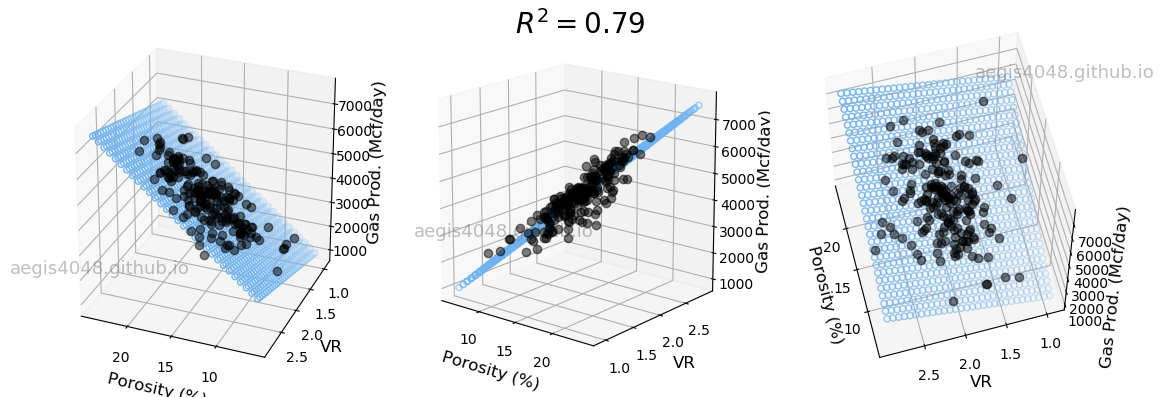

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()